In [1]:
require(data.table)
require(ggplot2)
require(RColorBrewer)
require(tidyr)
options(repr.plot.width=20, repr.plot.height=15)

Loading required package: data.table

Loading required package: ggplot2

Loading required package: RColorBrewer

Loading required package: tidyr



In [2]:
OBIS=read.csv("~/Documents/Lenfest/MPA_Gaps_Overview_Figure_CSV/OBIS_summary_ecoregion.csv")
covabs=read.csv("~/Documents/Lenfest/Plot_CSV_v2/Coverage_absolute.csv")
region=read.csv("~/Documents/Lenfest/Plot_CSV_v2/Regions.csv")

In [3]:
OBIScov=merge(OBIS, covabs, by=c("Ecoregion_ID", "NAME"))

In [4]:
OBIScov$ER=OBIScov$ER_Observations/OBIScov$ER_Area

In [5]:
OBIScov$MPA=OBIScov$ER_MPA_Observations/OBIScov$MPA_Area

In [6]:
OBIScov$FPA=OBIScov$ER_FP_MPA_Observations/OBIScov$FPA_Area

In [7]:
OBISobs=OBIScov[c(1,2,25:27)]

In [8]:
OBISobs

Ecoregion_ID,NAME,ER,MPA,FPA
<int>,<chr>,<dbl>,<dbl>,<dbl>
0,All Ecoregions,0.55695840,8.825497e-01,2.59573410
1,Acadian Atlantic,3.65994549,7.600007e+00,9.59200148
10,Columbian Pacific,1.10702307,9.937879e+00,4.24697458
11,Guam and Mariannas,0.20414989,2.869468e-01,712.74381763
12,Gulf Stream,0.26853738,NaN,NaN
13,Hawaiian Archipelago,0.12968881,1.403646e-01,0.58074902
14,Howland and Baker Islands,0.11100146,9.265497e-01,14.14376539
15,Jarvis Island,0.13448592,1.349003e-01,24.35230767
16,Montereyan Pacific Transition,0.73909600,4.398637e+00,4.53287914


In [9]:
OBIS1=pivot_longer(OBISobs, cols=c("ER", "FPA", "MPA"), names_to = "Area", values_to = "Obsperkm")


In [10]:
region

NAME,Ecoregion_ID,Region
<chr>,<int>,<chr>
American Samoa,4,Pacific Islands
Jarvis Island,15,Pacific Islands
Howland and Baker Islands,14,Pacific Islands
Palmyra Atoll,19,Pacific Islands
Guam and Mariannas,11,Pacific Islands
Wake Island,24,Pacific Islands
Hawaiian Archipelago,13,Pacific Islands
Southern Californian Pacific,21,West Coast
Montereyan Pacific Transition,16,West Coast


In [11]:
OBIS1r=merge(OBIS1, region, by=c("NAME", "Ecoregion_ID"))

In [12]:
OBIS1r

NAME,Ecoregion_ID,Area,Obsperkm,Region
<chr>,<int>,<chr>,<dbl>,<chr>
Acadian Atlantic,1,ER,3.659945e+00,East Coast
Acadian Atlantic,1,FPA,9.592001e+00,East Coast
Acadian Atlantic,1,MPA,7.600007e+00,East Coast
Alaskan/Fjordland Pacific,2,ER,7.112361e-02,Alaska
Alaskan/Fjordland Pacific,2,FPA,9.347627e-02,Alaska
Alaskan/Fjordland Pacific,2,MPA,1.188125e+00,Alaska
Aleutian Archipelago,3,ER,5.307413e-02,Alaska
Aleutian Archipelago,3,FPA,1.459925e-02,Alaska
Aleutian Archipelago,3,MPA,1.302089e-02,Alaska


Warning message:
“Removed 8 rows containing missing values (geom_bar).”


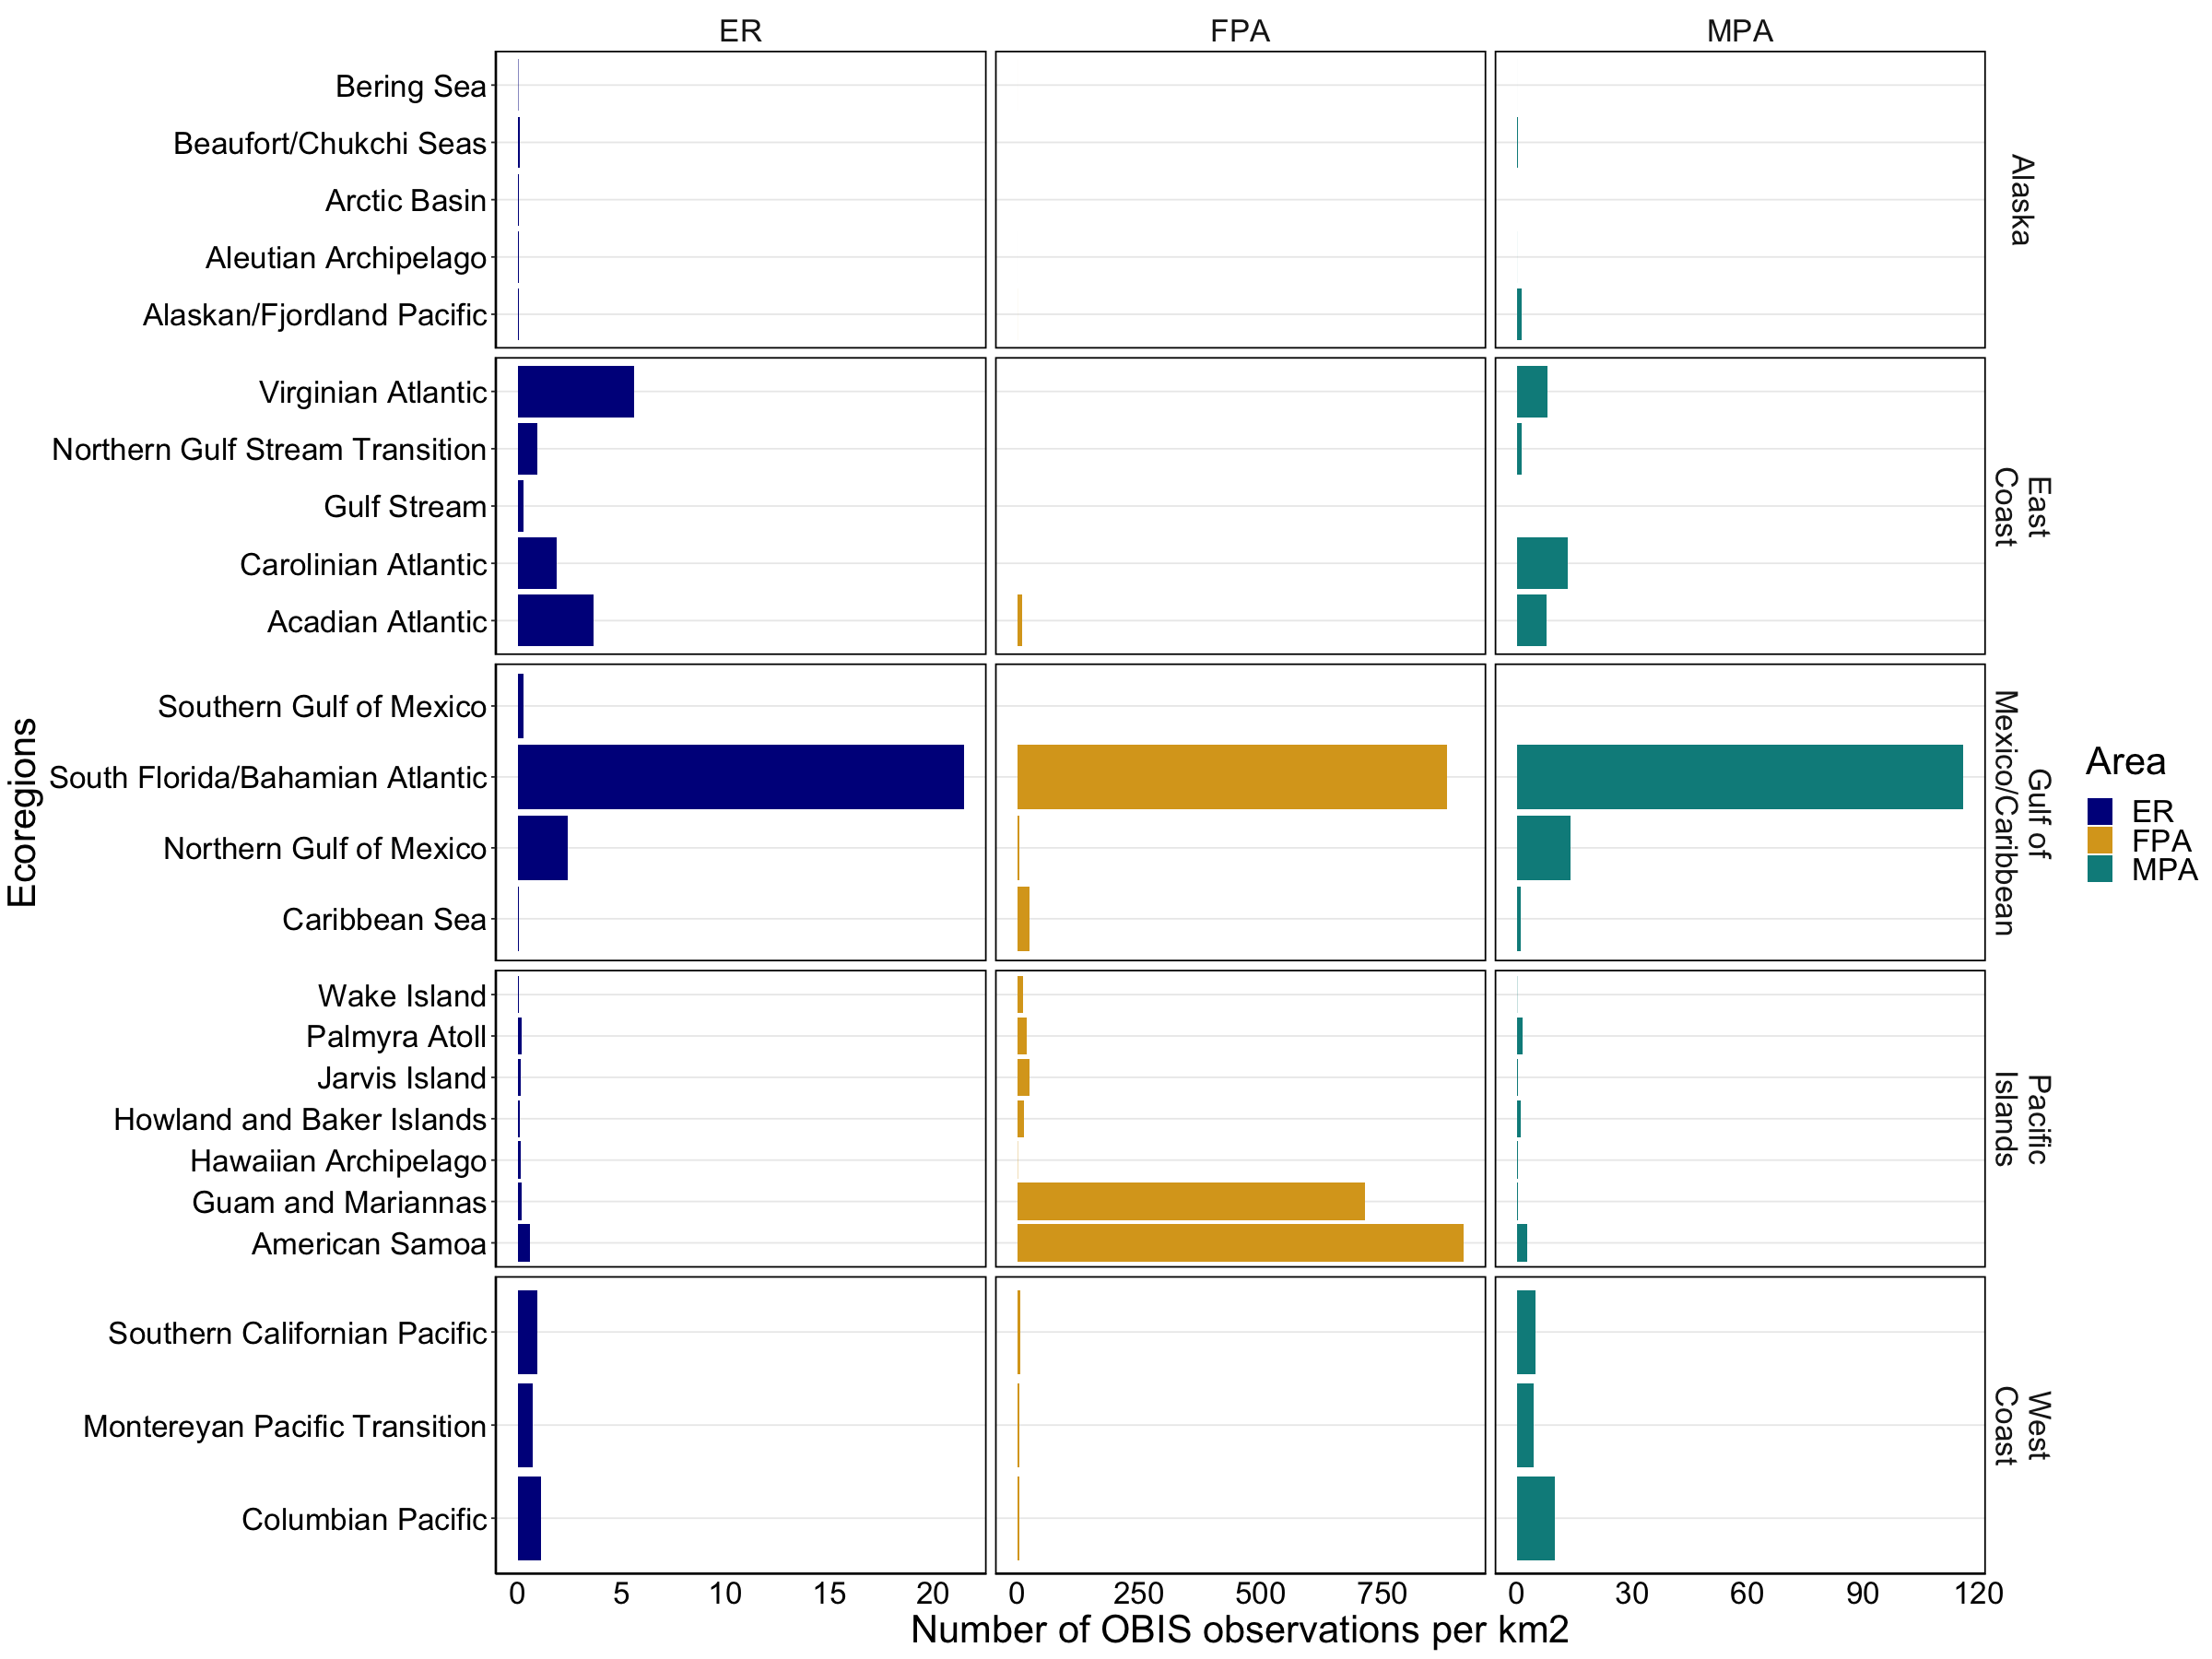

In [13]:
ggplot(OBIS1r, aes(y=NAME, x=Obsperkm)) +
geom_bar(position="identity", stat="identity", aes(fill=Area ))+
scale_color_manual(values=c("black", "black"))+
scale_fill_manual(values=c("darkblue","goldenrod", "cyan4"))+
facet_grid(Region~Area, scales="free",    labeller = labeller(Region = label_wrap_gen(10)))+
theme_bw()+
labs(x="Number of OBIS observations per km2", shape="", size="Percent of ER")+
theme(legend.position="right",  
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          panel.border=element_rect(colour="black",size=1),
          axis.ticks.x=element_blank(), 
          axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25),
          strip.background = element_blank())+
#coord_flip()+
ylab("Ecoregions")

In [15]:
ggsave(file="~/Documents/Lenfest/One Earth/Obs_ecoregion.pdf", width=20, height=10)

Warning message:
“Removed 8 rows containing missing values (geom_bar).”


In [69]:
ERr=OBIS1r[OBIS1r$Area=="ER",]
ERr[nrow(ERr) + 1,]=ERr[nrow(ERr),]
ERr[25,1]="Scale"


In [70]:
ERr=ERr[order(ERr$Region),]
ERr$NAME <- factor(ERr$NAME, levels = ERr$NAME)



In [71]:
ERr

,NAME,Ecoregion_ID,Area,Obsperkm,Region
,<fct>,<int>,<chr>,<dbl>,<chr>
4,Alaskan/Fjordland Pacific,2,ER,0.07112361,Alaska
7,Aleutian Archipelago,3,ER,0.05307413,Alaska
13,Arctic Basin,5,ER,0.05033847,Alaska
16,Beaufort/Chukchi Seas,6,ER,0.09860639,Alaska
19,Bering Sea,7,ER,0.02051251,Alaska
1,Acadian Atlantic,1,ER,3.65994549,East Coast
25,Carolinian Atlantic,9,ER,1.86216526,East Coast
34,Gulf Stream,12,ER,0.26853738,East Coast
52,Northern Gulf Stream Transition,18,ER,0.92367635,East Coast


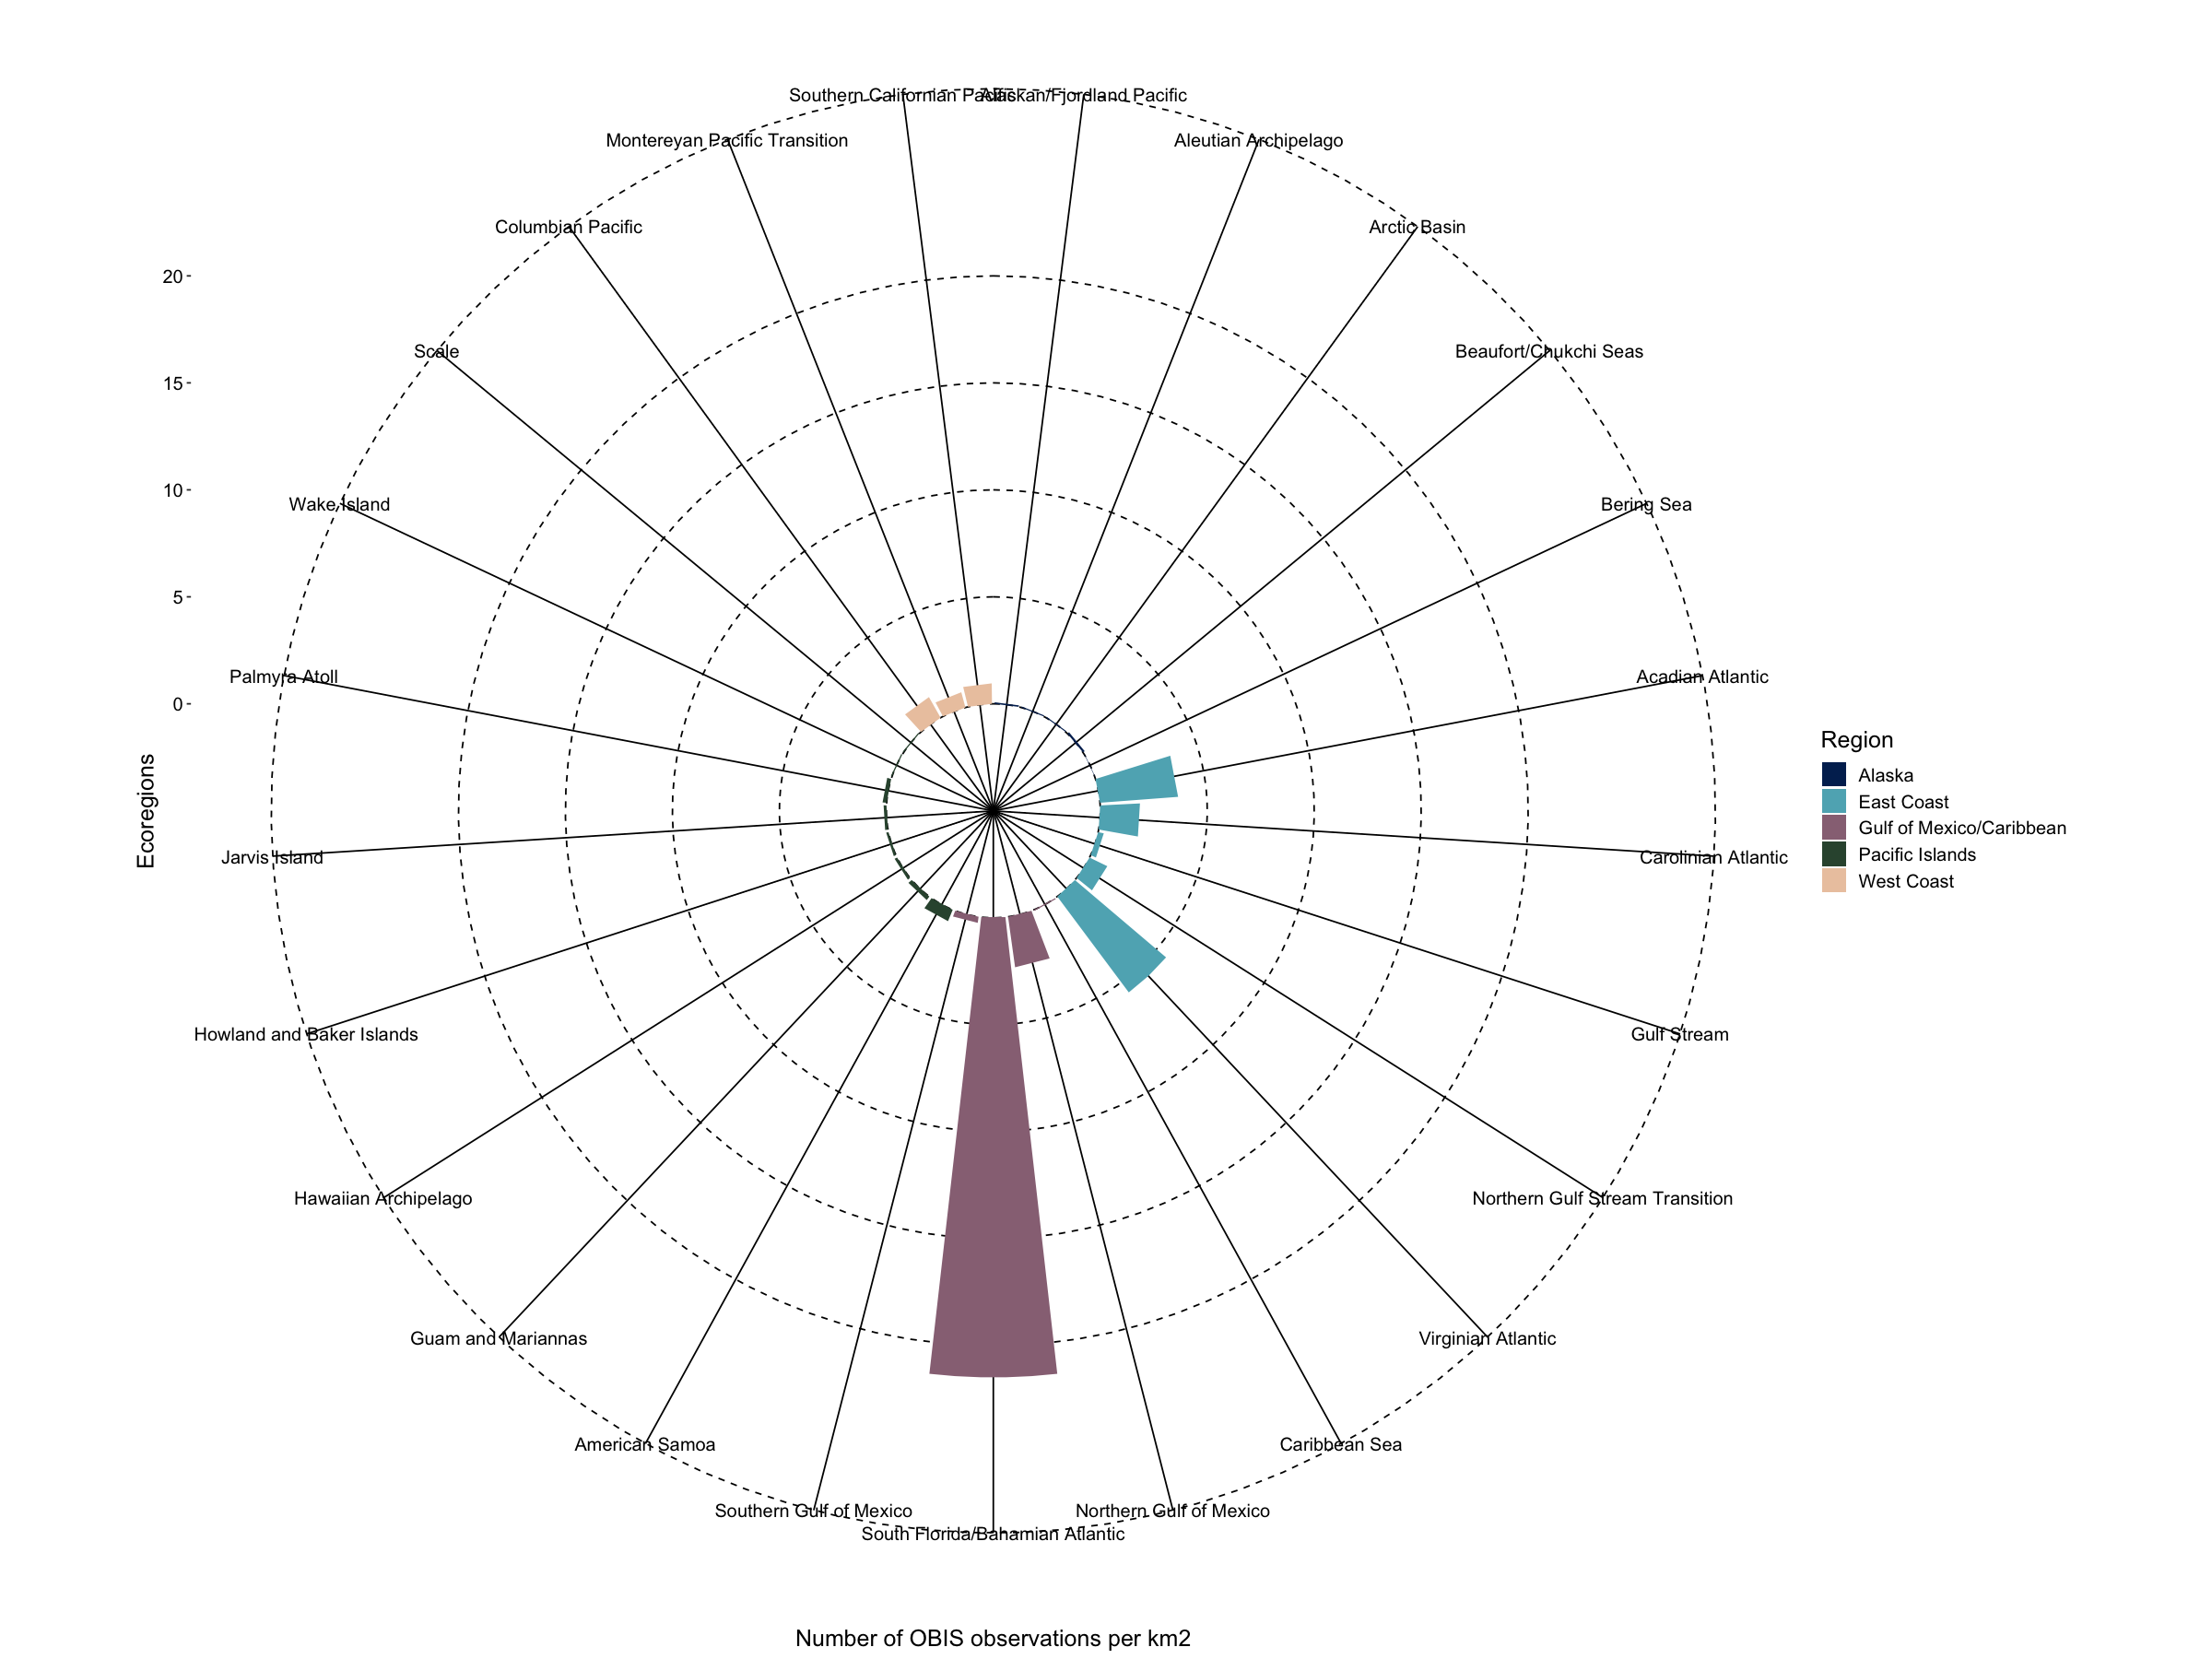

In [72]:
ggplot(ERr, aes(x=NAME, y=Obsperkm)) +
geom_bar(position="identity", stat="identity", aes(fill=Region ))+
scale_color_manual(values=c("black", "black"))+
scale_fill_manual(values=c("#01295f", "#5eb1bf", "#987284", "#32533d", "#ecc8ae"))+
#facet_grid(Region~Area, scales="free",    labeller = labeller(Region = label_wrap_gen(10)))+
 scale_y_continuous(
    limits = c(-5, 25),
    expand = c(0, 0),
    breaks = c(0, 5, 10, 15, 20))+
theme_bw()+
labs(x="Number of OBIS observations per km2", shape="", size="Percent of ER")+
theme(legend.position="right",  
          panel.grid.major.x = element_line(color="black"), 
          panel.grid.major.y = element_line(color="black", linetype="dashed"), 
          panel.grid.minor.x = element_blank(),
          panel.border=element_blank(),
          axis.ticks.x=element_blank(), 
          axis.line=element_blank(), axis.text=element_text(color="black"),
          text = element_text(size=15),
          strip.background = element_blank())+
#coord_flip()+
  coord_polar()+
ylab("Ecoregions")

In [73]:
ggsave(file="~/Documents/Lenfest/Observations_ER.pdf", width=20, height=10)
